In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

import warnings
# Suppress specific warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('Scholarship-Final.csv', parse_dates=['Date'], dayfirst=True)

In [49]:
df

,Date,School,Scholars
0,2018-02-01,UB,46
1,2018-02-01,LCC,320
2,2018-02-01,STI,71
3,2018-02-01,BCAS,12
4,2018-02-01,LPU - LAGUNA,4
...,...,...,...
125,2024-02-01,LPU - LAGUNA,3
126,2024-02-01,LPU - ST. CARBINI,4
127,2024-02-01,NU LIPA,33
128,2024-02-01,RBC,192


In [50]:
df

,Date,School,Scholars
0,2018-02-01,UB,46
1,2018-02-01,LCC,320
2,2018-02-01,STI,71
3,2018-02-01,BCAS,12
4,2018-02-01,LPU - LAGUNA,4
...,...,...,...
125,2024-02-01,LPU - LAGUNA,3
126,2024-02-01,LPU - ST. CARBINI,4
127,2024-02-01,NU LIPA,33
128,2024-02-01,RBC,192


In [51]:
df

,Date,School,Scholars
0,2018-02-01,UB,46
1,2018-02-01,LCC,320
2,2018-02-01,STI,71
3,2018-02-01,BCAS,12
4,2018-02-01,LPU - LAGUNA,4
...,...,...,...
125,2024-02-01,LPU - LAGUNA,3
126,2024-02-01,LPU - ST. CARBINI,4
127,2024-02-01,NU LIPA,33
128,2024-02-01,RBC,192


In [52]:
totalScholars = df.groupby('Date')['Scholars'].sum()

In [53]:
totalScholars

Date
2018-02-01     575
2018-10-01     541
2019-02-01    1387
2019-10-01     645
2020-02-01     578
2020-10-01     988
2021-02-01     949
2021-10-01    1319
2022-02-01    1231
2022-10-01    1458
2023-02-01    1396
2023-10-01    1604
2024-02-01    1464
Name: Scholars, dtype: int64

In [54]:
bySchoolDF = df.pivot(index='Date', columns='School', values='Scholars').fillna(0)

In [55]:
bySchoolDF

School,BCAS,FAITH,LCC,LPU - BATS,LPU - LAGUNA,LPU - ST. CARBINI,NU LIPA,RBC,STI,UB
Date,,,,,,,,,,
2018-02-01,12,26,320,43,4,0,0,53,71,46
2018-10-01,9,20,310,40,4,0,0,50,68,40
2019-02-01,21,12,561,115,4,0,0,63,79,532
2019-10-01,12,33,385,41,4,0,0,51,73,46
2020-02-01,13,27,326,46,4,0,0,50,62,50
2020-10-01,16,58,604,44,5,0,0,75,96,90
2021-02-01,15,58,571,46,4,0,0,72,95,88
2021-10-01,17,77,887,48,10,0,0,101,90,89
2022-02-01,17,78,833,45,10,0,0,96,61,91


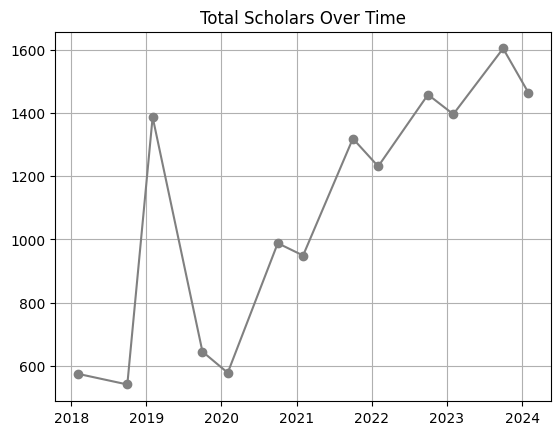

In [56]:
plt.plot(totalScholars, marker='o', color='gray')
plt.title('Total Scholars Over Time')
plt.grid()
plt.show()

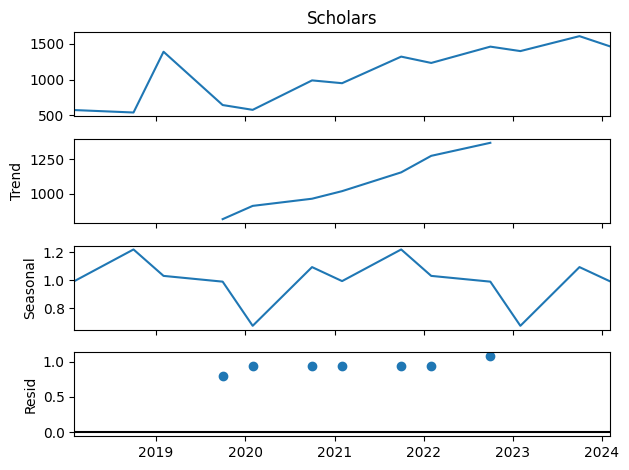

In [57]:
result = seasonal_decompose(totalScholars, model='multiplicative', period=6)
result.plot()
pyplot.show()

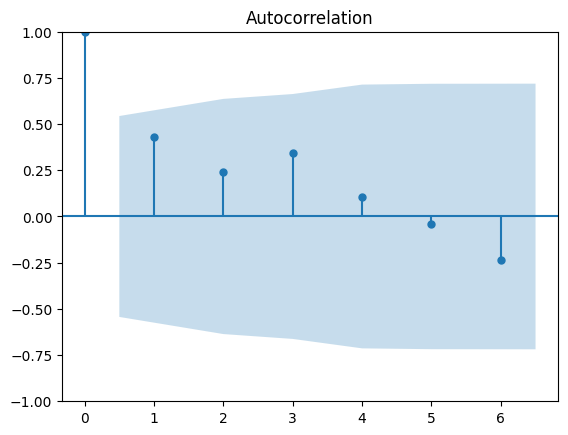

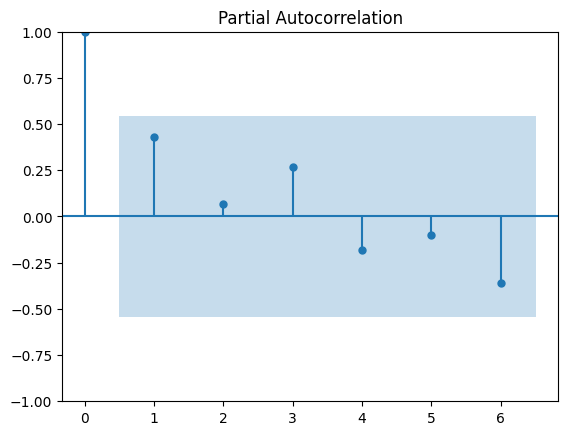

In [58]:
totalScholarsACF = plot_acf(totalScholars)
totalScholarsPACF = plot_pacf(totalScholars)

In [60]:
# Null Hypothesis: There is a unit root in the data. The data is non-stationary
# Alternative Hypothesis: There is no unit root in the data. The data is stationary

result = adfuller(totalScholars)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.08032325874173869
p-value: 0.9646917087222384


In [62]:
data_diff = totalScholars.diff().dropna()

# ADF test
result = adfuller(data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.925933866739474
p-value: 3.103953983509505e-05


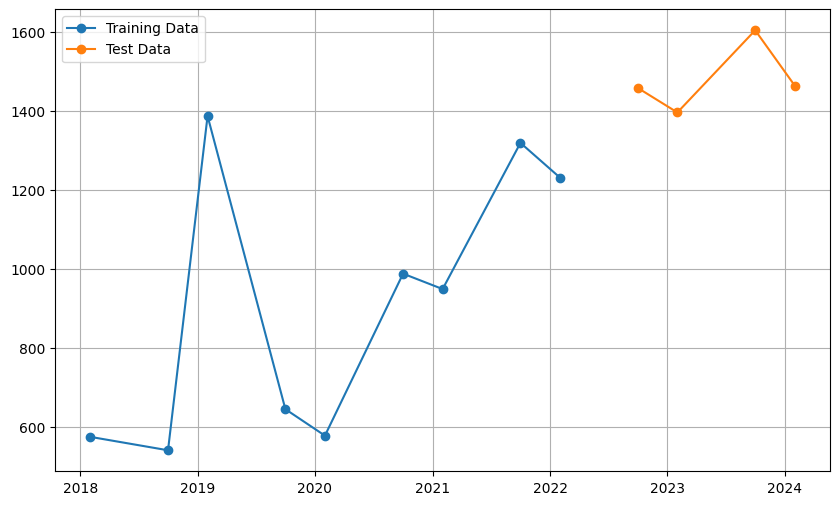

In [64]:
trainSize = int(len(totalScholars) * 0.7)
train, test = totalScholars[:trainSize], totalScholars[trainSize:]

plt.figure(figsize=(10,6))
plt.plot(train, label='Training Data', marker='o')
plt.plot(test, label='Test Data', marker='o')
plt.legend()
plt.grid()
plt.show()

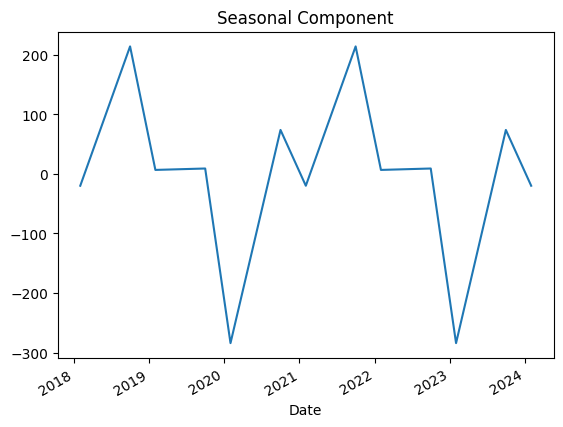

In [94]:
df.index = pd.to_datetime(df.index)
decomposition = seasonal_decompose(totalScholars, model='additive', period=6)
decomposition.seasonal.plot(title='Seasonal Component')
plt.show()

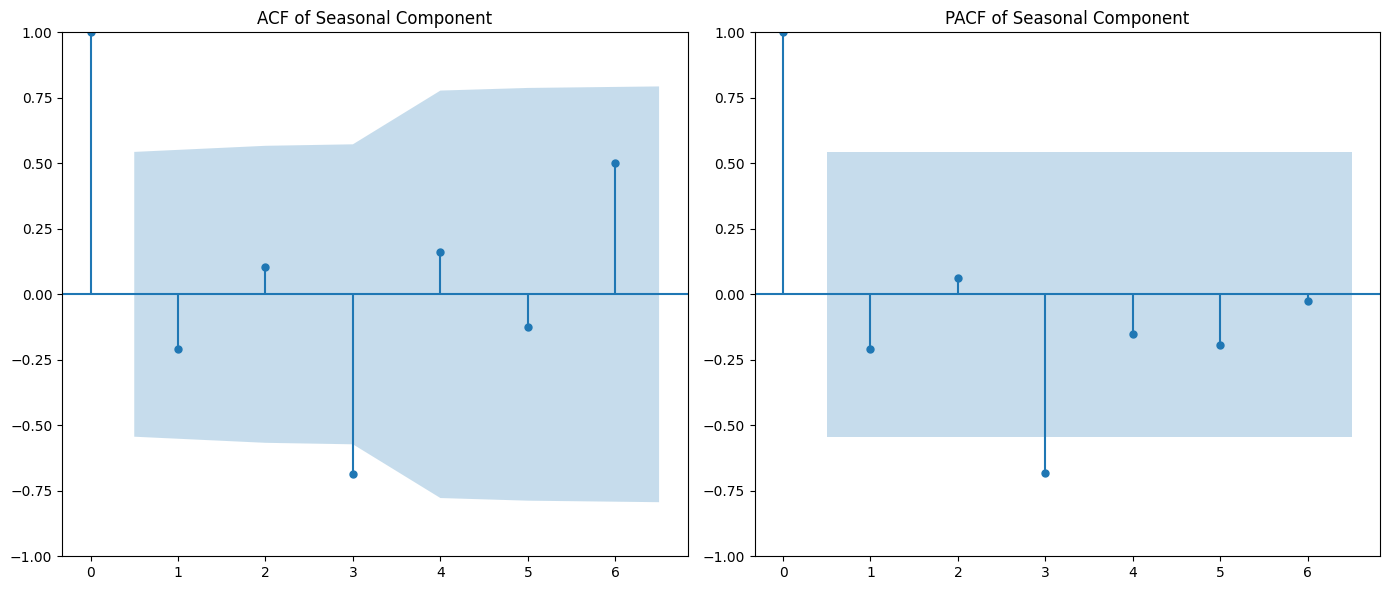

In [66]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(decomposition.seasonal.dropna(), lags=6, ax=plt.gca())
plt.title('ACF of Seasonal Component')

plt.subplot(122)
plot_pacf(decomposition.seasonal.dropna(), lags=6, ax=plt.gca())
plt.title('PACF of Seasonal Component')

plt.tight_layout()
plt.show()

In [67]:
result = adfuller(decomposition.seasonal.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -276290612215473.47
p-value: 0.0


In [88]:
model = SARIMAX(train, order=(0, 1, 0), seasonal_order=(1, 1, 1, 2), enforce_stationarity=True)

results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Scholars   No. Observations:                    9
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 2)   Log Likelihood                 -45.801
Date:                            Wed, 18 Sep 2024   AIC                             99.602
Time:                                    16:58:04   BIC                             98.769
Sample:                                         0   HQIC                            96.267
                                              - 9                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9833      3.252     -0.302      0.762      -7.357       5.391
ma.L2         -0.0047      1.135   

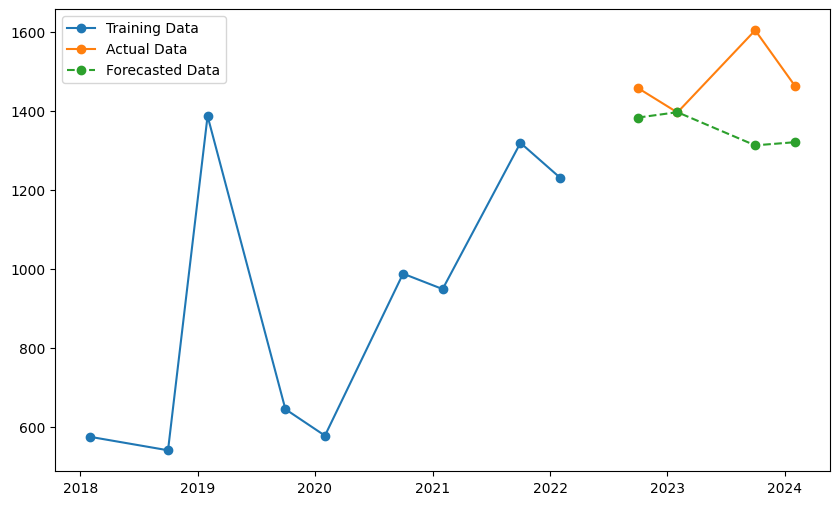

Root Mean Squared Error: 166.57534747682294


In [87]:
forecast = results.forecast(steps=len(test))

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Training Data', marker='o')
plt.plot(test.index, test, label='Actual Data', marker='o')
plt.plot(test.index, forecast, label='Forecasted Data', linestyle='--', marker='o')
plt.legend()
plt.show()

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

In [89]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt# Adjust accordingly

# Define the range of parameters
p = d = q = P = D = Q = range(0, 2)  # You can extend the range if necessary
seasonal_s = [2, 6, 12]  # Different seasonal periods (6 for semi-annual, 12 for annual)

# Store best model results
best_model = None
best_order = None
best_seasonal_order = None
lowest_rmse = np.inf

# Loop over all combinations of order and seasonal order
for param in itertools.product(p, d, q):
    for seasonal_param in itertools.product(P, D, Q, seasonal_s):
        try:
            # Define the model
            model = SARIMAX(train, order=param, seasonal_order=(seasonal_param[0], seasonal_param[1], seasonal_param[2], seasonal_param[3]),
                            enforce_stationarity=True)

            # Fit the model
            results = model.fit(disp=False)

            # Forecast for the length of the test set
            forecast = results.forecast(steps=len(test))

            # Calculate the RMSE
            mse = mean_squared_error(test, forecast)
            rmse = np.sqrt(mse)

            # If we get a better model, save it
            if rmse < lowest_rmse:
                lowest_rmse = rmse
                best_model = results
                best_order = param
                best_seasonal_order = seasonal_param

        except Exception as e:
            print(f'Error fitting model for order {param} and seasonal_order {seasonal_param}: {e}')

# Print best model details
print(f'Best Model: Order: {best_order}, Seasonal Order: {best_seasonal_order}, Lowest RMSE: {lowest_rmse}')


Error fitting model for order (0, 0, 0) and seasonal_order (1, 1, 0, 12): Schur decomposition solver error.
Error fitting model for order (0, 1, 0) and seasonal_order (1, 1, 0, 12): Schur decomposition solver error.
Error fitting model for order (1, 0, 0) and seasonal_order (0, 1, 0, 12): Input contains NaN.
Error fitting model for order (1, 0, 0) and seasonal_order (0, 1, 1, 12): Schur decomposition solver error.
Error fitting model for order (1, 0, 0) and seasonal_order (1, 1, 0, 12): Schur decomposition solver error.
Error fitting model for order (1, 0, 0) and seasonal_order (1, 1, 1, 12): Schur decomposition solver error.
Error fitting model for order (1, 1, 0) and seasonal_order (0, 1, 0, 12): Input contains NaN.
Error fitting model for order (1, 1, 0) and seasonal_order (0, 1, 1, 12): Schur decomposition solver error.
Error fitting model for order (1, 1, 0) and seasonal_order (1, 1, 0, 12): Schur decomposition solver error.
Error fitting model for order (1, 1, 0) and seasonal_ord

In [90]:
train

Date
2018-02-01     575
2018-10-01     541
2019-02-01    1387
2019-10-01     645
2020-02-01     578
2020-10-01     988
2021-02-01     949
2021-10-01    1319
2022-02-01    1231
Name: Scholars, dtype: int64

In [95]:
model = SARIMAX(train, order=(0, 1, 2), seasonal_order=(1, 1, 0, 2))

results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Scholars   No. Observations:                    9
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 2)   Log Likelihood                 -45.801
Date:                            Wed, 18 Sep 2024   AIC                             99.602
Time:                                    17:05:14   BIC                             98.769
Sample:                                         0   HQIC                            96.267
                                              - 9                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9833      3.252     -0.302      0.762      -7.357       5.391
ma.L2         -0.0047      1.135   

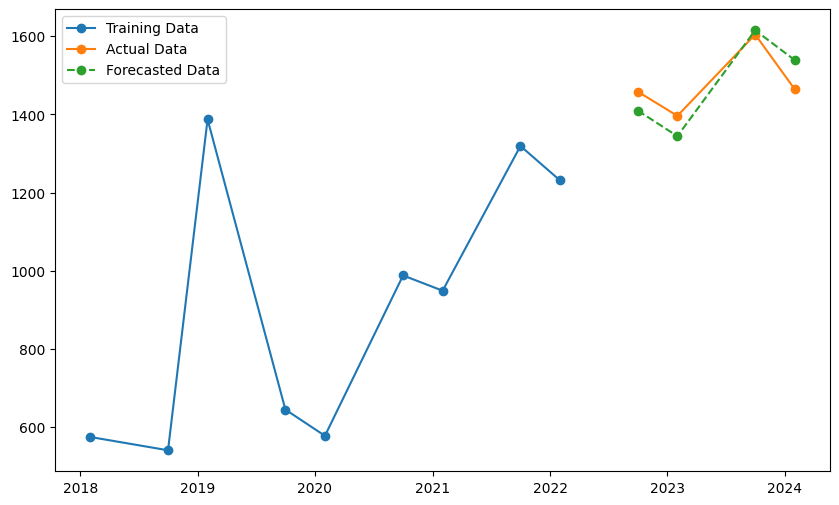

Root Mean Squared Error: 51.77317776399147


In [96]:
forecast = results.forecast(steps=len(test))

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Training Data', marker='o')
plt.plot(test.index, test, label='Actual Data', marker='o')
plt.plot(test.index, forecast, label='Forecasted Data', linestyle='--', marker='o')
plt.legend()
plt.show()

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

In [97]:
forecast.index = test.index

model_result = pd.DataFrame({
    'Actual': test,
    'Forecast': forecast
})
model_result['Difference'] = model_result['Actual'] - model_result['Forecast']

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(model_result)
print(" ")
print(f'Root Mean Squared Error: {rmse}')


            Actual     Forecast  Difference
Date                                       
2022-10-01    1458  1409.508414   48.491586
2023-02-01    1396  1344.114492   51.885508
2023-10-01    1604  1614.850878  -10.850878
2024-02-01    1464  1538.569205  -74.569205
 
Root Mean Squared Error: 51.77317776399147


In [100]:
# Null Hypothesis: The residuals are independently distributed.
# Alternative Hypothesis: The residuals are not independently distributed; they exhibit serial correlation.
sm.stats.acorr_ljungbox(results.resid, lags=[8], return_df=True)

,lb_stat,lb_pvalue
8,5.652757,0.686063


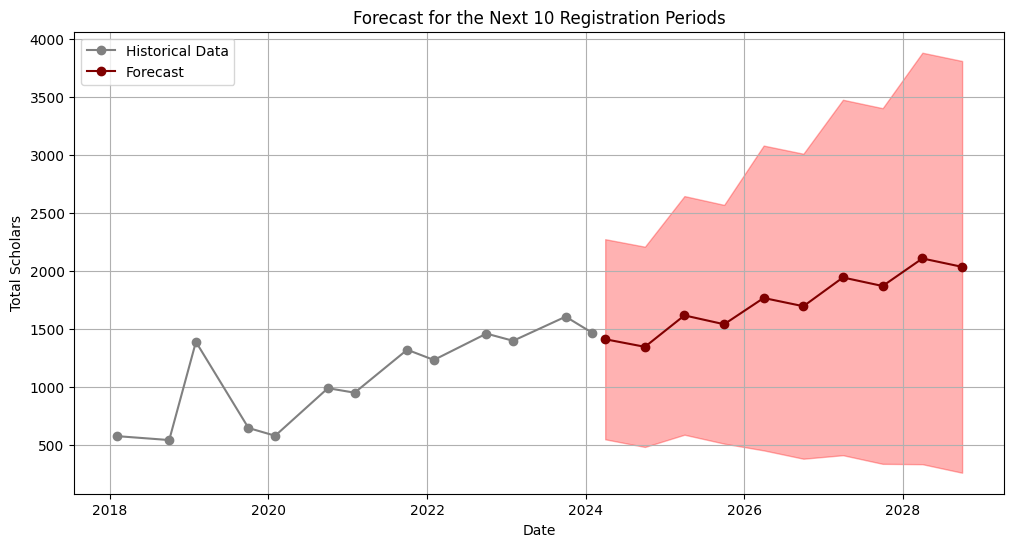

In [104]:
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=totalScholars.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='6M')
forecast_mean = forecast.predicted_mean
forecast_mean.index = forecast_index

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(totalScholars.index, totalScholars, label='Historical Data', marker='o', color='gray')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='maroon', marker='o')
plt.fill_between(forecast_mean.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='red', alpha=0.3)
plt.title('Forecast for the Next 10 Registration Periods')
plt.xlabel('Date')
plt.ylabel('Total Scholars')
plt.legend()
plt.grid()
plt.show()

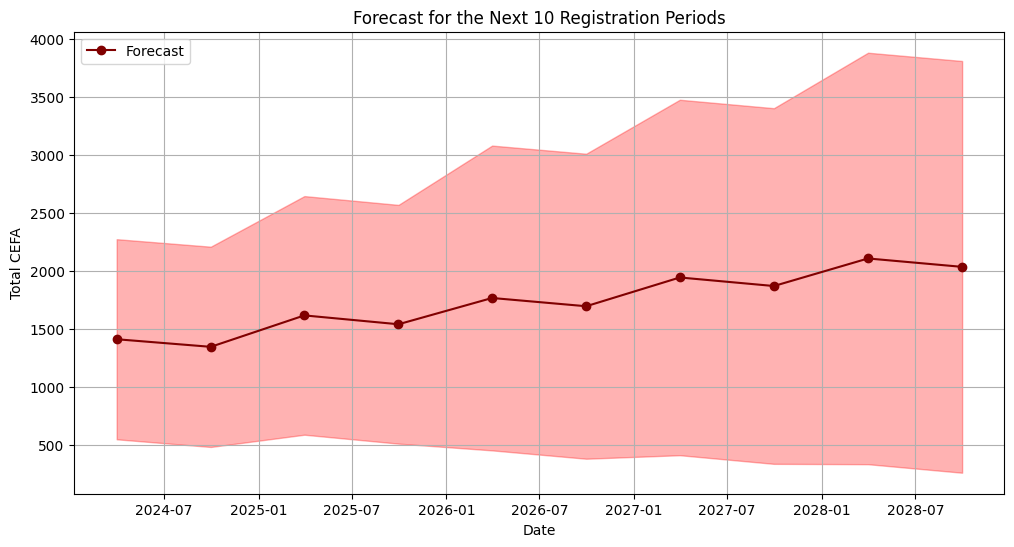

In [105]:
# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='maroon', marker='o')
plt.fill_between(forecast_mean.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='red', alpha=0.3)
plt.title('Forecast for the Next 10 Registration Periods')
plt.xlabel('Date')
plt.ylabel('Total CEFA')
plt.legend()
plt.grid()
plt.show()

In [107]:
forecast_mean

2024-03-31    1409.508414
2024-09-30    1344.114492
2025-03-31    1614.850878
2025-09-30    1538.569205
2026-03-31    1764.885891
2026-09-30    1693.848079
2027-03-31    1941.558596
2027-09-30    1867.995187
2028-03-31    2105.401807
2028-09-30    2033.054799
Freq: 6ME, Name: predicted_mean, dtype: float64